In [3]:
import itk
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [6]:
image=itk.imread("./BrainT1_OriginalSize.nii")

In [9]:
metadata_dict=dict(image)
metadata_dict

{'ITK_FileNotes': '',
 'aux_file': 'none',
 'bitpix': '32',
 'cal_max': '0',
 'cal_min': '0',
 'datatype': '16',
 'descrip': '',
 'dim[0]': '3',
 'dim[1]': '160',
 'dim[2]': '192',
 'dim[3]': '160',
 'dim[4]': '1',
 'dim[5]': '1',
 'dim[6]': '1',
 'dim[7]': '1',
 'dim_info': '0',
 'intent_code': '0',
 'intent_name': '',
 'intent_p1': '0',
 'intent_p2': '0',
 'intent_p3': '0',
 'nifti_type': '1',
 'pixdim[0]': '0',
 'pixdim[1]': '1',
 'pixdim[2]': '1',
 'pixdim[3]': '1',
 'pixdim[4]': '1',
 'pixdim[5]': '1',
 'pixdim[6]': '1',
 'pixdim[7]': '1',
 'qfac': 0.0,
 'qform_code': '0',
 'qform_code_name': 'NIFTI_XFORM_UNKNOWN',
 'qoffset_x': '0',
 'qoffset_y': '0',
 'qoffset_z': '0',
 'qto_xyz': itkMatrixF44 ([[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]]),
 'quatern_b': '0',
 'quatern_c': '0',
 'quatern_d': '0',
 'scl_inter': '0',
 'scl_slope': '0',
 'sform_code': '1',
 'sform_code_name': 'NIFTI_XFORM_SCANNER_ANAT',
 'slice_code': '0',
 'slice_duratio

In [64]:
new_spacing=[0.5, 0.5, 0.5]
interpolator = itk.LinearInterpolateImageFunction.New(image)
resampler=itk.ResampleImageFilter.New(image)
resampler.SetOutputSpacing(new_spacing)
print(itk.size(image))
resampler.SetSize(itk.size(image))
resampler.SetOutputDirection(image.GetDirection())
#resampler.SetOutputOrigin([160*0.5,192*0.5,160*0.5])
resampler.SetOutputOrigin(image.GetOrigin())
resampler.SetInterpolator(interpolator)
resampler.Update()
resampled=resampler.GetOutput()
resampler.SetSize([160*2, 192*2, 160*2])
resampled
print(image.GetOrigin())
print(resampled.GetOrigin())
print(resampled.shape)
print(image.GetSpacing())
print(resampled.GetSpacing())

itkSize3 ([160, 192, 160])
itkPointD3 ([-1, -1, 1])
itkPointD3 ([-1, -1, 1])
(160, 192, 160)
itkVectorD3 ([1, 1, 1])
itkVectorD3 ([0.5, 0.5, 0.5])


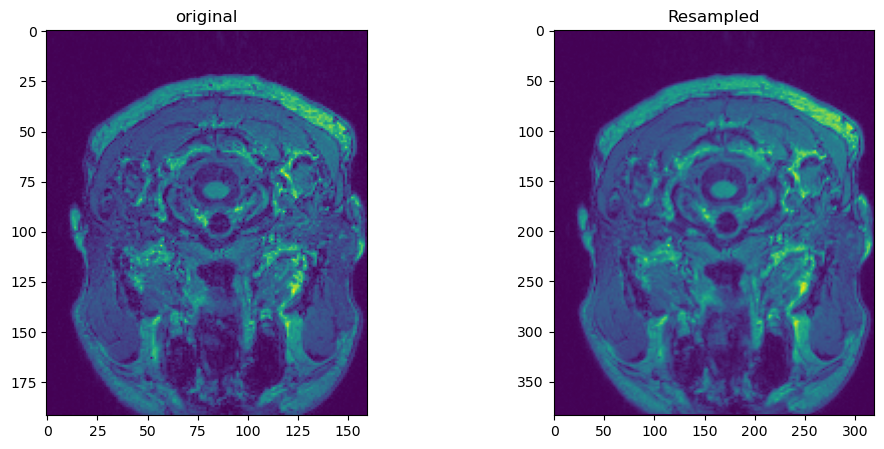

In [67]:
dims=int(metadata_dict['dim[0]'])
fig,axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].imshow(image[int(dims/2), :, :])
axs[0].set_title("original")
axs[1].imshow(resampled[int(dims/2), :, :])
axs[1].set_title('Resampled')
plt.show()
